In [1]:
# Parameters
method_name = "GroHess"
result_number = 10
visualization_settings = {"savefig": True, "visualize_accs_matrix": True, "visualize_avg_acc_curve": True, "visualize_best_params": True, "visualize_val_accs_matrix": True, "visualize_accuracy_through_benchmarks": True}


In [2]:
# Comment the following cell if running through the command :
# papermill runnable_visualization.ipynb executed_visualization.ipynb -f params_for_visualization.yaml --kernel jupyter.jax_env

method_name = "GroHess"
result_number = 10

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import load, get_folder

In [4]:
folder = get_folder (method_name, result_number)

In [5]:
test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings = load(method_name, result_number)

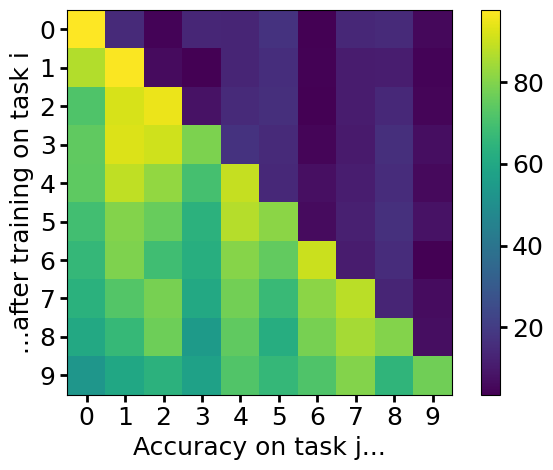

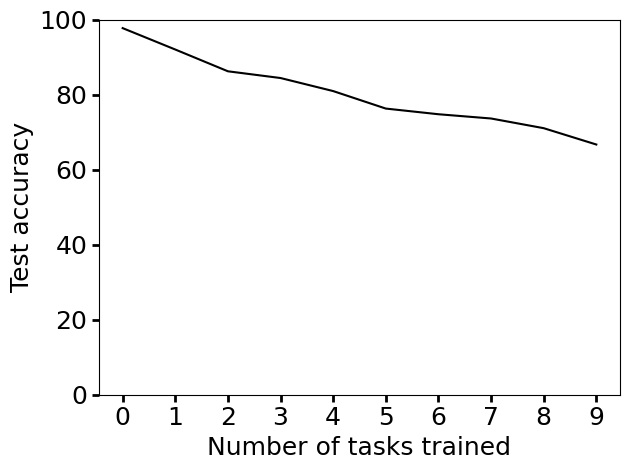

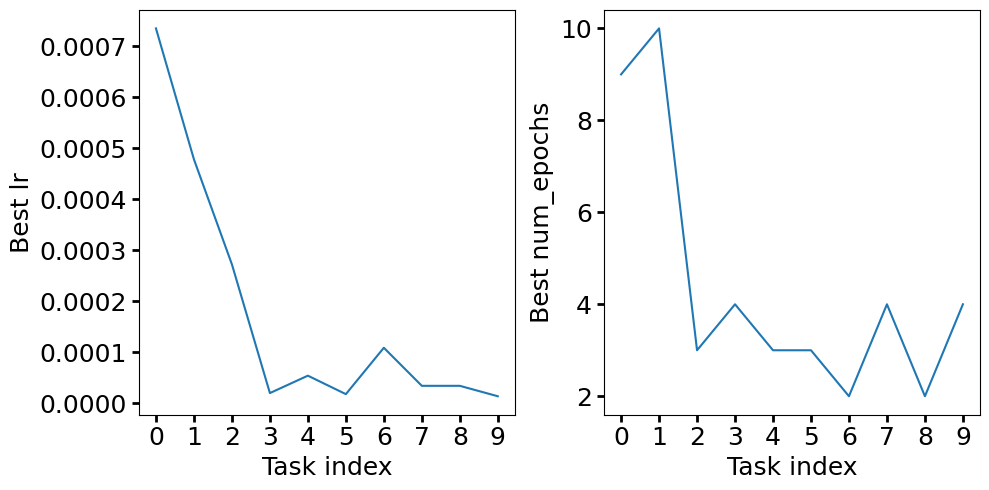

In [6]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings, folder)

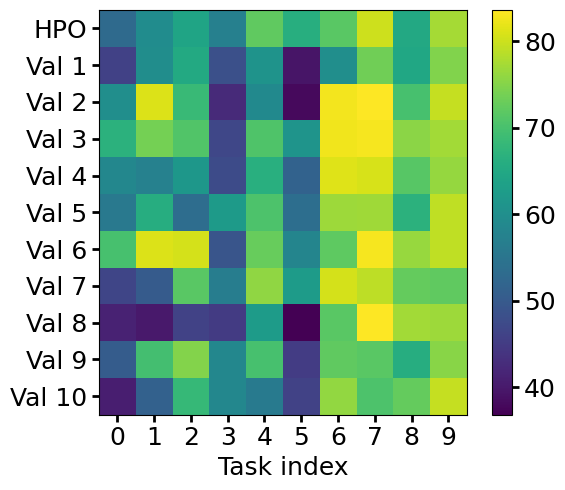

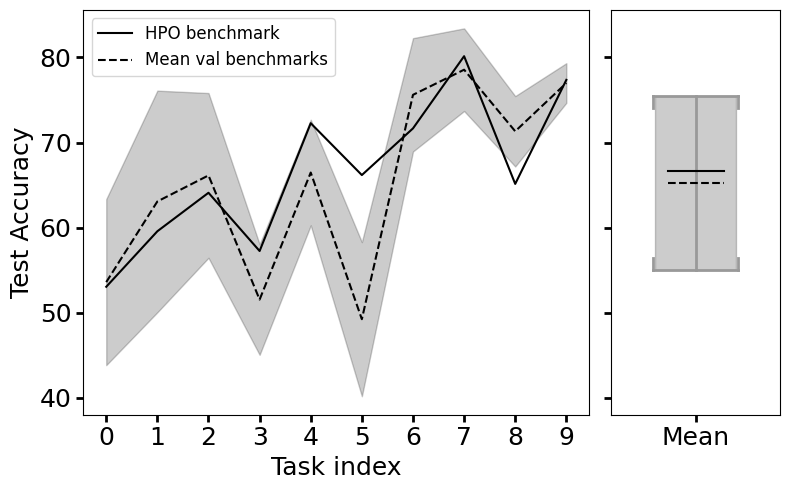

In [7]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings, folder)